In [169]:
import numpy as np
import pandas as pd
import seaborn as sns

In [170]:
data=pd.read_csv('Downloads/Train_Data.csv')
data.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [171]:
data_test=pd.read_csv('Downloads/Test_Data.csv')
data_test.head()

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0


In [172]:
print(data.isnull().sum())
print(data_test.isnull().sum())

date           0
campaign       0
adgroup        0
ad             0
impressions    0
clicks         0
cost           0
conversions    0
revenue        0
dtype: int64
date           0
campaign       0
adgroup        0
ad             0
cost           0
impressions    0
clicks         0
conversions    0
dtype: int64


In [173]:
print(data.info())
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4571 non-null   object 
 1   campaign     4571 non-null   object 
 2   adgroup      4571 non-null   object 
 3   ad           4571 non-null   object 
 4   impressions  4571 non-null   int64  
 5   clicks       4571 non-null   int64  
 6   cost         4571 non-null   float64
 7   conversions  4571 non-null   int64  
 8   revenue      4571 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 321.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         318 non-null    object 
 1   campaign     318 non-null    object 
 2   adgroup      318 non-null    object 
 3   ad           318 non-null    object 
 4   co

In [127]:
#data['date'] = pd.to_datetime(data['date'])

#data['Month'] = data['date'].dt.month
#data['Day of the month'] = data['date'].dt.day
#data['Year'] = data['date'].dt.year

#data = data.drop(['date'], axis=1)


In [128]:
#data_test['date'] = pd.to_datetime(data_test['date'])

#data_test['Month'] = data_test['date'].dt.month
#data_test['Day of the month'] = data_test['date'].dt.day
#data_test['Year'] = data_test['date'].dt.year

#datatest = data_test.drop(['date'], axis=1)

In [174]:
print(data.head())
print(data_test.head())

         date    campaign    adgroup    ad  impressions  clicks  cost  \
0  01-08-2020  campaign 1  adgroup 1  ad 1           24       6  0.08   
1  01-08-2020  campaign 1  adgroup 2  ad 1            1       0  0.00   
2  01-08-2020  campaign 1  adgroup 3  ad 1           13       4  0.04   
3  01-08-2020  campaign 1  adgroup 4  ad 1            5       4  0.08   
4  01-08-2020  campaign 1  adgroup 1  ad 2          247     126  1.29   

   conversions  revenue  
0            0     0.00  
1            0     0.00  
2            0     0.00  
3            0     0.00  
4            4   925.71  
         date    campaign    adgroup    ad  cost  impressions  clicks  \
0  01-03-2021  campaign 1  adgroup 1  ad 1  0.58          121      49   
1  01-03-2021  campaign 1  adgroup 3  ad 1  0.17           22      12   
2  01-03-2021  campaign 1  adgroup 4  ad 1  0.05            5       3   
3  01-03-2021  campaign 1  adgroup 2  ad 1  0.01            2       1   
4  01-03-2021  campaign 1  adgroup 2  ad

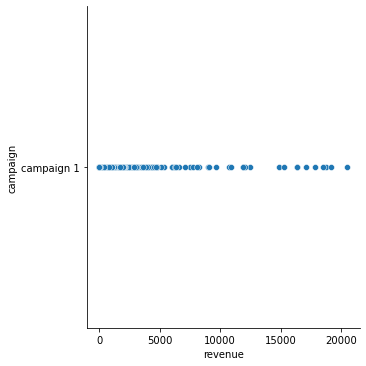

In [141]:
sns.relplot(x='revenue',y='campaign',data=data)

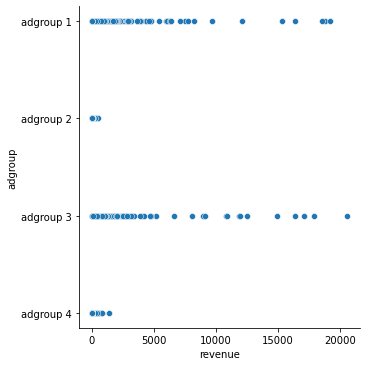

In [142]:
sns.relplot(x='revenue',y='adgroup',data=data)

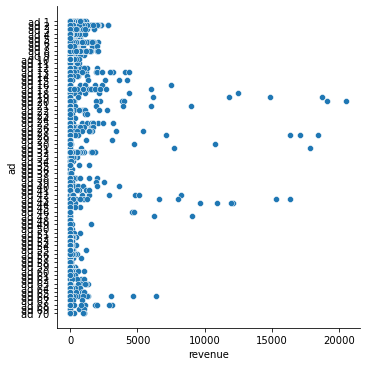

In [143]:
sns.relplot(x='revenue',y='ad',data=data)

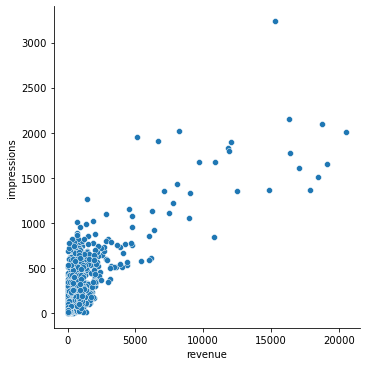

In [144]:
sns.relplot(x='revenue',y='impressions',data=data)

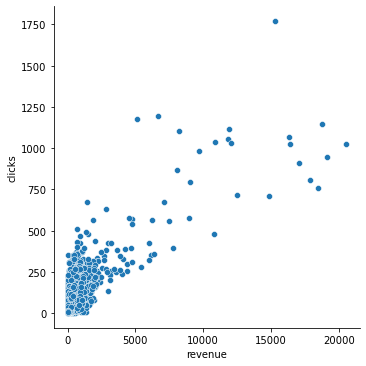

In [145]:
sns.relplot(x='revenue',y='clicks',data=data)

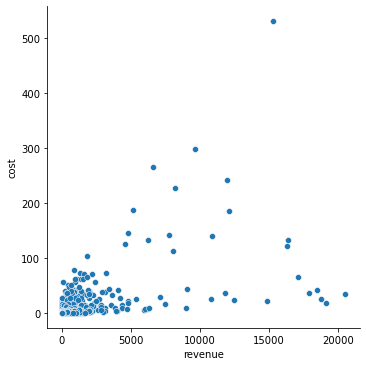

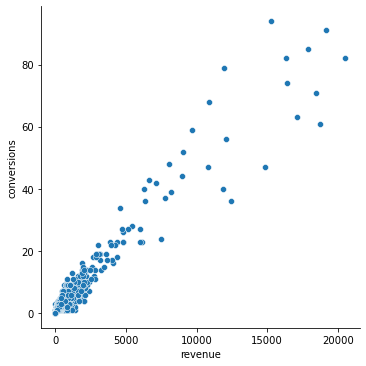

In [146]:
sns.relplot(x='revenue',y='cost',data=data)
sns.relplot(x='revenue',y='conversions',data=data)

In [175]:
from sklearn.model_selection import train_test_split

X=data.drop(['date','campaign','adgroup','ad','revenue'],axis=1)
tst=data_test.drop(['date','campaign','adgroup','ad'],axis=1)
y=data['revenue']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#print(data.head())
#print(data_test.head())

In [176]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestRegressor()
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [177]:
ans = clf.predict(tst)

In [179]:
submit=pd.DataFrame(ans)
submit[submit<0]=0
submit=ans

In [180]:
prediction = pd.DataFrame(ans, columns=['revenue']).to_csv('answer1.csv')